# Movie Recommendation

The Movie Recommendation System is a data-driven solution designed to assist users in discovering movies based on their preferences. With the vast amount of available movie data, users often face challenges in choosing movies that align with their tastes. The recommendation system alleviates this problem by analyzing user behavior, preferences, and movie characteristics to suggest personalized movie recommendations.


# Team Members

Aishwarya SVS

002774851

Arjun Janardhan

001566405

Sanidhya Mathur

002766999



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Section 1: Data Loading and Preprocessing

In this section, we load and preprocess movie data. We merge two datasets on the 'title' column, select relevant columns, and use the extract_names function to retrieve names from JSON-formatted strings. The dataset is then cleaned by dropping missing values, and name extraction is applied to 'genres' and 'keywords' columns.

In [4]:
#from google.colab import drive

# Mount Google Drive
#drive.mount('/content/gdrive')

file_path1 = '/Users/aj/Documents/AlgorithmicDigitalMarketing/Final Project/tmdb_5000_movies.csv'
file_path2 = '/Users/aj/Documents/AlgorithmicDigitalMarketing/Final Project/tmdb_5000_credits.csv'

# Read CSV files
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


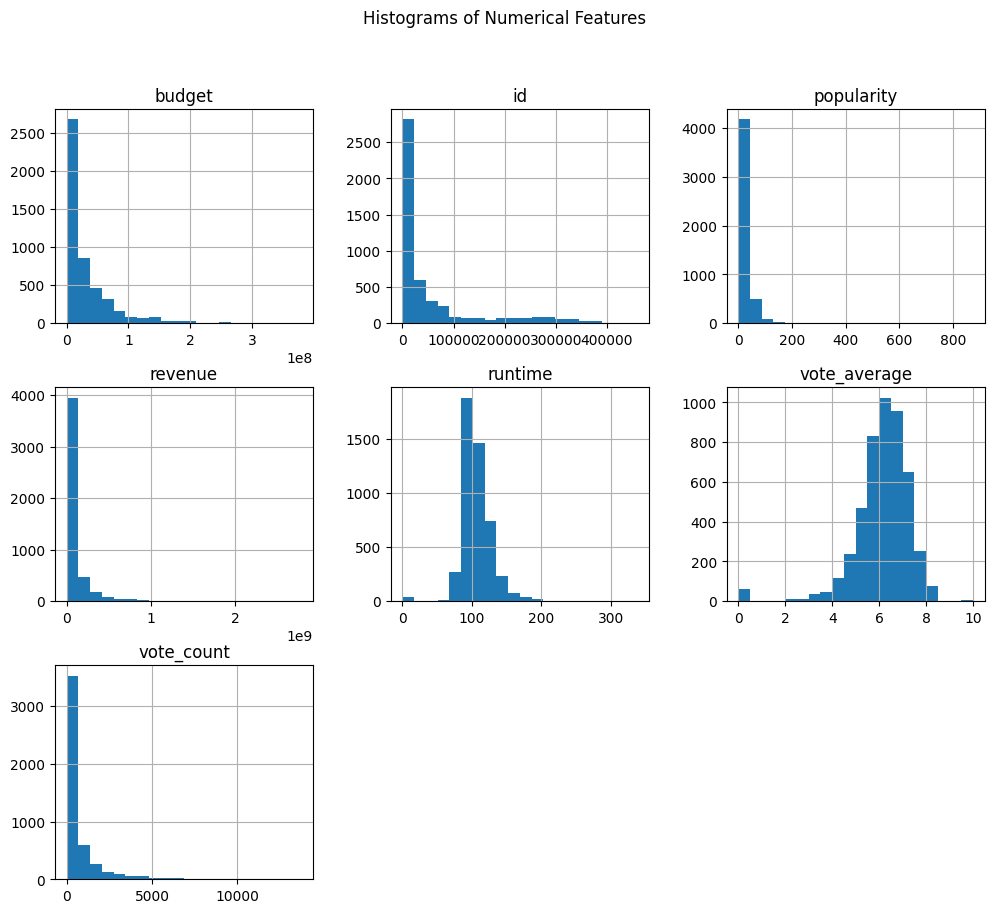

In [5]:
df1.hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

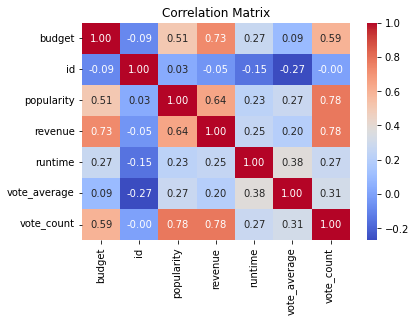

In [7]:
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

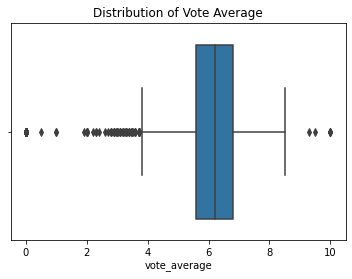

In [8]:
sns.boxplot(x='vote_average', data=df1)
plt.title('Distribution of Vote Average')
plt.show()

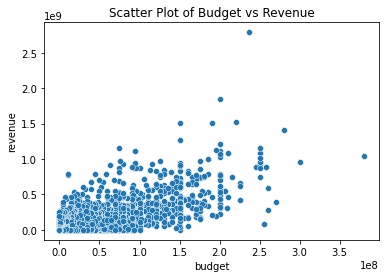

In [9]:
sns.scatterplot(x='budget', y='revenue', data=df1)
plt.title('Scatter Plot of Budget vs Revenue')
plt.show()

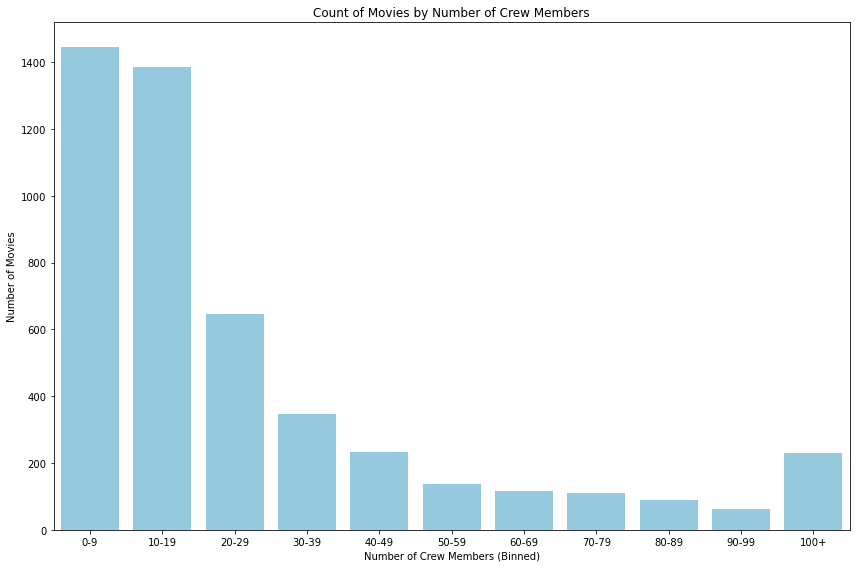

In [10]:
# Binning the crew members for better readability
plt.figure(figsize=(12, 8))

# Create bins for crew members
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
bin_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
df2['crew_bins'] = pd.cut(df2['crew'].apply(lambda x: len(eval(x))), bins=bins, labels=bin_labels, right=False)

# Plot the count of movies in each bin
sns.countplot(x='crew_bins', data=df2, color='skyblue', order=bin_labels)

plt.title('Count of Movies by Number of Crew Members')
plt.xlabel('Number of Crew Members (Binned)')
plt.ylabel('Number of Movies')

plt.tight_layout()  # Adjust layout for better visualization
plt.show()

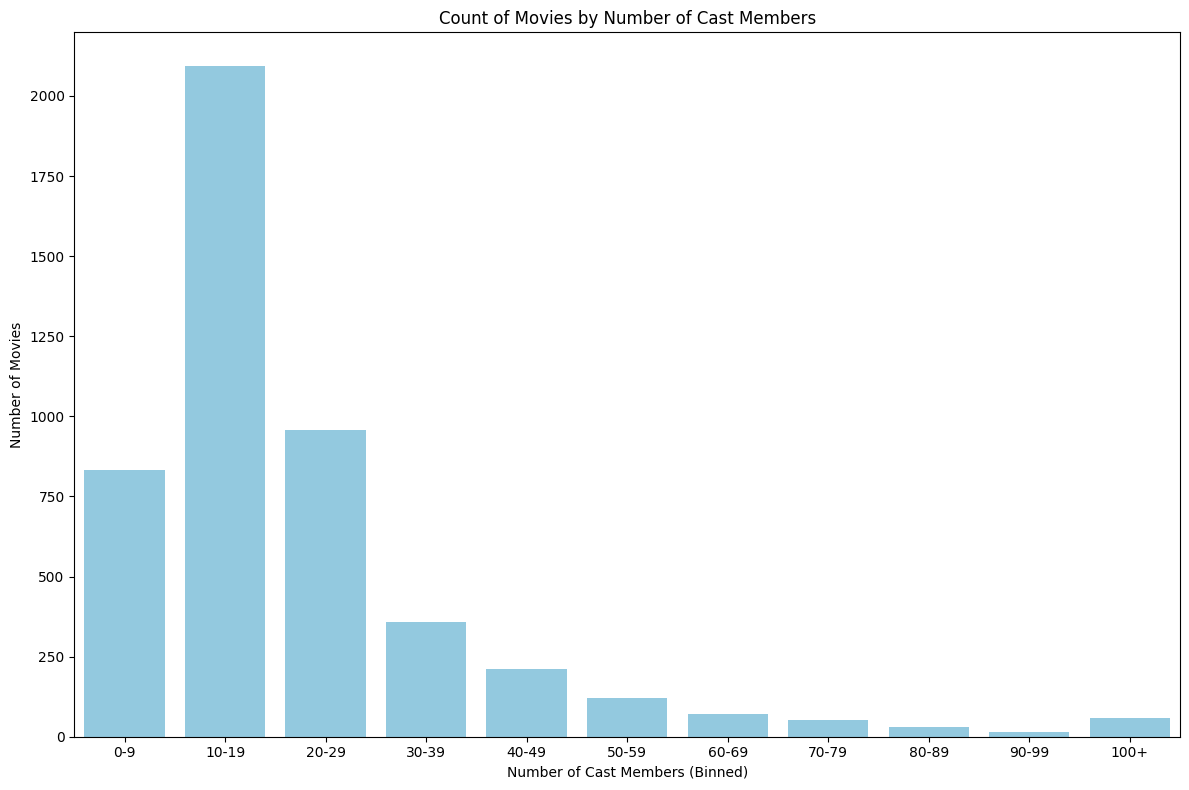

In [10]:
# Binning the cast members for better readability
plt.figure(figsize=(12, 8))

# Create bins for cast members
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
bin_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
df2['cast_bins'] = pd.cut(df2['cast'].apply(lambda x: len(eval(x))), bins=bins, labels=bin_labels, right=False)

# Plot the count of movies in each bin
sns.countplot(x='cast_bins', data=df2, color='skyblue', order=bin_labels)

plt.title('Count of Movies by Number of Cast Members')
plt.xlabel('Number of Cast Members (Binned)')
plt.ylabel('Number of Movies')

plt.tight_layout()  # Adjust layout for better visualization
plt.show()

In [11]:
movies = df1
credits = df2

In [12]:
movies = movies.merge(credits,on='title')

In [13]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [14]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [15]:
import ast  # Import the ast module for working with Abstract Syntax Trees.

def extract_names(json_text):
    # Initialize an empty list to store extracted 'name' values.
    names_list = []

    # Use ast.literal_eval to safely evaluate the input json_text as a Python literal.
    # This assumes that the input json_text represents a list of dictionaries.
    for item in ast.literal_eval(json_text):
        # Iterate over each dictionary in the list and extract the value associated with the 'name' key.
        # Append the extracted 'name' value to the list names_list.
        names_list.append(item['name'])

    # Return the final list containing the 'name' values extracted from the input json_text.
    return names_list

# Example usage:
# json_input = '[{"name": "John"}, {"name": "Alice"}, {"name": "Bob"}]'
# result_names = extract_names(json_input)
# print(result_names)

In [16]:
movies.dropna(inplace=True)

In [17]:
movies['genres'] = movies['genres'].apply(extract_names)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [18]:
movies['keywords'] = movies['keywords'].apply(extract_names)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [19]:
import ast  # Import the ast module for working with Abstract Syntax Trees.

def extract_top_genre_names(json_text):
    """
    Extracts the names of the top 3 genres from a JSON-formatted text.

    Args:
    - json_text (str): A JSON-formatted string representing a list of genres.

    Returns:
    - list: A list containing the names of the top 3 genres.
    """
    # Initialize an empty list to store the names of the top 3 genres.
    top_genre_names = []

    # Use ast.literal_eval to safely evaluate the input json_text as a Python literal.
    # This assumes that the input json_text represents a list of dictionaries.
    genres_list = ast.literal_eval(json_text)

    # Counter to keep track of the number of genres processed.
    counter = 0

    # Iterate over each genre dictionary in the list.
    for genre in genres_list:
        # Check if the counter is less than 3 to include only the top 3 genres.
        if counter < 3:
            # Append the name of the current genre to the list top_genre_names.
            top_genre_names.append(genre['name'])

        # Increment the counter.
        counter += 1

    # Return the list containing the names of the top 3 genres.
    return top_genre_names

# Example usage:
json_input = '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
result_genre_names = extract_top_genre_names(json_input)
print(result_genre_names)

['Action', 'Adventure', 'Fantasy']


# Section 2: Genre and Director Extraction

This section focuses on extracting information related to genres and directors. The extract_top_genre_names function is introduced to retrieve the names of the top 3 genres. Names are also extracted from the 'cast' column, and only the first three are retained. Director names are extracted from the 'crew' column.


In [20]:
movies['cast'] = movies['cast'].apply(extract_names)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [21]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [22]:
import ast  # Import the ast module for working with Abstract Syntax Trees.

def extract_director_names(json_text):
    """
    Extracts the names of directors from a JSON-formatted text.

    Args:
    - json_text (str): A JSON-formatted string representing a list of crew members.

    Returns:
    - list: A list containing the names of directors.
    """
    # Initialize an empty list to store the names of directors.
    director_names = []

    # Use ast.literal_eval to safely evaluate the input json_text as a Python literal.
    # This assumes that the input json_text represents a list of dictionaries.
    crew_list = ast.literal_eval(json_text)

    # Iterate over each crew member dictionary in the list.
    for crew_member in crew_list:
        # Check if the job of the current crew member is 'Director'.
        if crew_member['job'] == 'Director':
            # Append the name of the director to the list director_names.
            director_names.append(crew_member['name'])

    # Return the list containing the names of directors.
    return director_names

# Example usage:
json_input = '[{"name": "James Cameron", "job": "Director"}, {"name": "Christopher Nolan", "job": "Director"}, {"name": "Steven Spielberg", "job": "Producer"}]'
result_director_names = extract_director_names(json_input)
print(result_director_names)

['James Cameron', 'Christopher Nolan']


In [23]:
movies['crew'] = movies['crew'].apply(extract_director_names)

In [24]:
movies.sample()

,movie_id,title,overview,genres,keywords,cast,crew
2551,77016,End of Watch,Two young officers are marked for death after ...,"[Crime, Drama, Thriller]","[los angeles, bullet proof vest, u.s. marine, ...","[Jake Gyllenhaal, Michael Peña, Natalie Martinez]",[David Ayer]


# Section 3: Text Processing and Spaces Collapsing

This section introduces text processing tasks. The collapse_spaces_in_list function is defined to remove spaces in each string of a list. The function is then applied to 'cast', 'crew', 'genres', and 'keywords' columns.

In [25]:
def collapse_spaces_in_list(original_list):
    """
    Collapses spaces in each string of the input list.

    Args:
    - original_list (list): List of strings containing spaces.

    Returns:
    - list: A new list where spaces in each string are removed.
    """
    # Initialize an empty list to store strings with spaces collapsed.
    collapsed_list = []

    # Iterate over each string in the original list.
    for original_string in original_list:
        # Replace spaces in the current string with an empty string.
        collapsed_string = original_string.replace(" ", "")

        # Append the modified string to the collapsed_list.
        collapsed_list.append(collapsed_string)

    # Return the list containing strings with spaces collapsed.
    return collapsed_list

# Example usage:
input_list = ["Hello World", "Python Programming", "Data Science"]
result_collapsed_list = collapse_spaces_in_list(input_list)
print(result_collapsed_list)

['HelloWorld', 'PythonProgramming', 'DataScience']


In [26]:
movies['cast'] = movies['cast'].apply(collapse_spaces_in_list)
movies['crew'] = movies['crew'].apply(collapse_spaces_in_list)
movies['genres'] = movies['genres'].apply(collapse_spaces_in_list)
movies['keywords'] = movies['keywords'].apply(collapse_spaces_in_list)

In [27]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


# Section 4: Combining Text Columns

Here, a function named process_movie_data is introduced to combine text columns ('overview', 'genres', 'keywords', 'cast', 'crew') into a new column 'tags'. The processed DataFrame, named processed_movies, is displayed.


In [28]:
import pandas as pd

def process_movie_data(movies):
    """
    Process movie data by combining text columns.

    Args:
    - movies (pd.DataFrame): DataFrame containing movie data.

    Returns:
    - pd.DataFrame: Processed DataFrame with 'tags' column.
    """
    # Fill NaN values with empty strings before combining columns.
    movies.fillna('', inplace=True)

    # Convert list columns to strings before combining.
    for column in ['overview', 'genres', 'keywords', 'cast', 'crew']:
        movies[column] = movies[column].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

    # Combine relevant columns to form 'tags' column.
    movies['tags'] = (
        movies['overview'] +
        movies['genres'] +
        movies['keywords'] +
        movies['cast'] +
        movies['crew']
    )

    # Drop unnecessary columns.
    new = movies.drop(columns=['overview', 'genres', 'keywords', 'cast', 'crew'])

    return new

# Example usage:
# Assuming 'movies' is a DataFrame with the necessary columns
# (overview, genres, keywords, cast, crew) already present.

In [29]:
# processed_movies is the resulting DataFrame after applying the processing.
processed_movies = process_movie_data(movies)
print(processed_movies)

      movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4804      9367                               El Mariachi   
4805     72766                                 Newlyweds   
4806    231617                 Signed, Sealed, Delivered   
4807    126186                          Shanghai Calling   
4808     25975                         My Date with Drew   

                                                   tags  
0     In the 22nd century, a paraplegic Marine is di...  
1     Captain Barbossa, long believed to be dead, ha...  
2     A cryptic message from Bond’s past sends him o...  
3     Following the death of District Attorney 

In [30]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy ScienceFiction,cultureclash future spacewar spacecolony socie...,SamWorthington ZoeSaldana SigourneyWeaver,JamesCameron,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,ocean drugabuse exoticisland eastindiatradingc...,JohnnyDepp OrlandoBloom KeiraKnightley,GoreVerbinski,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,spy basedonnovel secretagent sequel mi6 britis...,DanielCraig ChristophWaltz LéaSeydoux,SamMendes,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,Action Crime Drama Thriller,dccomics crimefighter terrorist secretidentity...,ChristianBale MichaelCaine GaryOldman,ChristopherNolan,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca...",Action Adventure ScienceFiction,basedonnovel mars medallion spacetravel prince...,TaylorKitsch LynnCollins SamanthaMorton,AndrewStanton,"John Carter is a war-weary, former military ca..."


In [31]:
print("\nSummary Statistics for Movies Dataset:")
print(movies.describe())


Summary Statistics for Movies Dataset:
            movie_id
count    4806.000000
mean    56922.559509
std     88309.447559
min         5.000000
25%      9009.750000
50%     14615.500000
75%     58476.750000
max    447027.000000


In [32]:
print("\nMissing Values in Movies Dataset:")
print(movies.isnull().sum())


Missing Values in Movies Dataset:
movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
tags        0
dtype: int64


# Section 5: Feature Extraction

This section focuses on feature extraction using the CountVectorizer. The 'tags' column is converted into a matrix of token counts, and the resulting shape is displayed.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [34]:
vector = cv.fit_transform(processed_movies['tags']).toarray()

In [35]:
vector.shape

(4806, 5000)

# Section 6: Cosine Similarity and Movie Recommendation

In this final section, cosine similarity between movies is calculated based on the extracted features. A movie recommendation function (recommend) is defined, and an example usage is provided to recommend movies similar to - The Dark Knight, Inception or Avatar

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.06963106, 0.06700252, ..., 0.02594996, 0.02787473,
        0.        ],
       [0.06963106, 1.        , 0.03849002, ..., 0.02981424, 0.        ,
        0.        ],
       [0.06700252, 0.03849002, 1.        , ..., 0.02868877, 0.        ,
        0.        ],
       ...,
       [0.02594996, 0.02981424, 0.02868877, ..., 1.        , 0.07161149,
        0.0248452 ],
       [0.02787473, 0.        , 0.        , ..., 0.07161149, 1.        ,
        0.05337605],
       [0.        , 0.        , 0.        , ..., 0.0248452 , 0.05337605,
        1.        ]])

In [37]:
processed_movies[processed_movies['title'] == 'The Shawshank Redemption'].index[0]

1887

In [46]:
def recommend(movie):
    try:
        index = processed_movies[processed_movies['title'] == movie].index[0]
        distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
        for i in distances[1:6]:
            print(processed_movies.iloc[i[0]].title)
    except IndexError:
        print(f"Movie '{movie}' not found in the dataset. Unable to provide recommendations.")

In [45]:
recommend('The Dark Knight') 

The Dark Knight Rises
Batman Returns
Batman Forever
Amidst the Devil's Wings


In [47]:
import pickle

# Save the processed_movies DataFrame as a pickle file
processed_movies.to_pickle('movie_recommender_processed_data.pkl')

# Save the CountVectorizer model as a pickle file
with open('count_vectorizer_model.pkl', 'wb') as file:
    pickle.dump(cv, file)

# Save the cosine similarity matrix as a pickle file
with open('cosine_similarity_matrix.pkl', 'wb') as file:
    pickle.dump(similarity, file)


In [ ]:
import pickle

pickle.dump(processed_movies,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [40]:
recommend('Inception')

Timecop
The Helix... Loaded


In [41]:
recommend('Avatar')

Aliens vs Predator: Requiem
Beowulf


In [42]:
recommend('Harry Potter and the Half-Blood Prince')

Harry Potter and the Order of the Phoenix
Harry Potter and the Prisoner of Azkaban


Next Word Predictor

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Assuming you already have your DataFrame loaded
# For example: movies = pd.read_csv("your_dataset.csv")

# Extract movie titles
titles = movies['title'].tolist()

# Tokenize the titles
tokenizer = Tokenizer()
tokenizer.fit_on_texts(titles)
total_words = len(tokenizer.word_index) + 1

# Create input sequences and labels
input_sequences = []
for line in titles:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = to_categorical(y, num_classes=total_words)

# Build the model
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_length-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=1)

# Function to generate next word predictions
def generate_next_word(seed_text, n_words):
    for _ in range(n_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        predicted_probabilities = model.predict(token_list, verbose=0)
        predicted = int(tf.argmax(predicted_probabilities, axis=-1))
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Generate predictions
seed_text = "The"
predicted_text = generate_next_word(seed_text, 3)
print(predicted_text)

Epoch 1/100
269/269 [==============================] - 11s 33ms/step - loss: 7.6190 - accuracy: 0.0647
Epoch 2/100
269/269 [==============================] - 10s 38ms/step - loss: 6.9569 - accuracy: 0.0803
Epoch 3/100
269/269 [==============================] - 13s 49ms/step - loss: 6.7983 - accuracy: 0.0857
Epoch 4/100
269/269 [==============================] - 15s 57ms/step - loss: 6.6890 - accuracy: 0.0947
Epoch 5/100
269/269 [==============================] - 14s 53ms/step - loss: 6.5834 - accuracy: 0.1006
Epoch 6/100
269/269 [==============================] - 7s 26ms/step - loss: 6.4561 - accuracy: 0.1067
Epoch 7/100
269/269 [==============================] - 8s 31ms/step - loss: 6.3115 - accuracy: 0.1118
Epoch 8/100
269/269 [==============================] - 7s 26ms/step - loss: 6.1497 - accuracy: 0.1142
Epoch 9/100
269/269 [==============================] - 9s 32ms/step - loss: 5.9879 - accuracy: 0.1196
Epoch 10/100
269/269 [==============================] - 7s 25ms/step - loss: 

In [ ]:
# Generate predictions
seed_text = "The Dark"
predicted_text = generate_next_word(seed_text, 3)
print(predicted_text)

In [ ]:
# Generate predictions
seed_text = "Kabhi"
predicted_text = generate_next_word(seed_text, 3)
print(predicted_text)
type(predicted_text)
recommend(predicted_text)

In [ ]:
predicted_text

In [ ]:
# Generate predictions
seed_text = "Kabhi"
predicted_text = generate_next_word(seed_text, 3)
print(predicted_text)

In [ ]:
def to_title_case(s):
    result = ""
    for char in s:
        if char.isupper():
            result += " " + char
        else:
            result += char
    return result.title()

# Example usage
input_str = predicted_text
title_str = to_title_case(input_str)

title_str = title_str.strip()
print(title_str)

In [ ]:
recommend(title_str)

In [ ]:
# Generate predictions
seed_text = "Kung"
predicted_text = generate_next_word(seed_text, 3)
print(predicted_text)

In [ ]:
# Generate predictions
seed_text = "Captain America"
predicted_text = generate_next_word(seed_text, 3)
print(predicted_text)

In [ ]:
# Generate predictions
seed_text = "Guardians"
predicted_text = generate_next_word(seed_text, 3)
print(predicted_text)

In [ ]:
# Generate predictions
seed_text = "Guardians"
predicted_text = generate_next_word(seed_text, 3)
print(predicted_text)

In [ ]:
import pickle

In [ ]:
pickle.dump(processed_movies,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))